<a href="https://colab.research.google.com/github/SupunJayaweera/Computer_Vision_Assignment_2_3998/blob/main/Computer_Vision_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 01

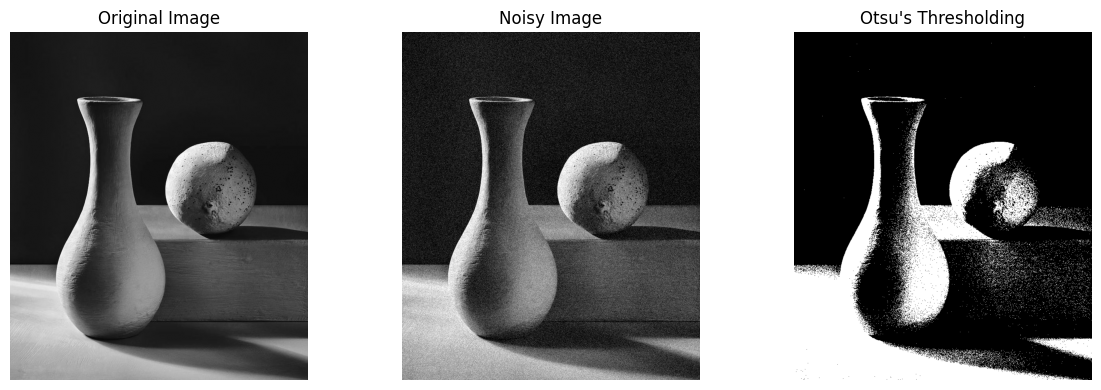

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded grayscale image
image = cv2.imread('/content/vision_img.jpg', cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise
mean = 0
stddev = 20
noise = np.random.normal(mean, stddev, image.shape).astype(np.int16)
noisy_image = np.clip(image.astype(np.int16) + noise, 0, 255).astype(np.uint8)

# Apply Otsu's Thresholding
_, otsu_result = cv2.threshold(noisy_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Otsu's Thresholding")
plt.imshow(otsu_result, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()


# Task 02

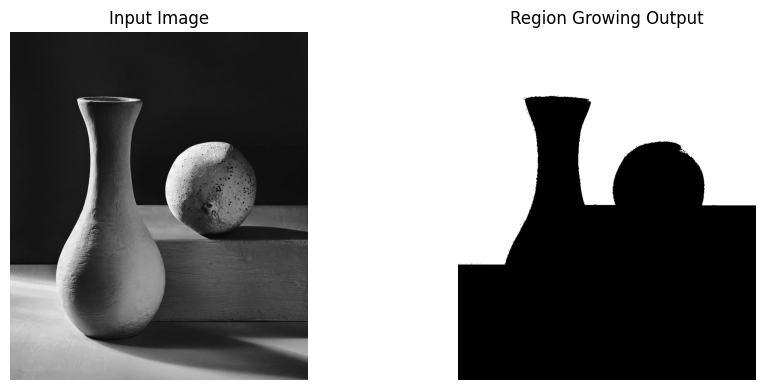

In [12]:
def region_growing(img, seed, threshold=15):
    h, w = img.shape
    visited = np.zeros_like(img, dtype=np.bool_)
    region = np.zeros_like(img, dtype=np.uint8)

    seed_value = img[seed]
    queue = [seed]
    visited[seed] = True

    while queue:
        x, y = queue.pop(0)
        region[x, y] = 255
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                nx, ny = x + dx, y + dy
                if (0 <= nx < h) and (0 <= ny < w) and not visited[nx, ny]:
                    if abs(int(img[nx, ny]) - int(seed_value)) <= threshold:
                        queue.append((nx, ny))
                        visited[nx, ny] = True
    return region

# Load grayscale image again (or reuse)
image = cv2.imread('/content/vision_img.jpg', cv2.IMREAD_GRAYSCALE)

# Choose a seed point manually (row, col) - adjust as needed
seed_point = (50, 50)  # You can change this after seeing the image

# Apply Region Growing
region_result = region_growing(image, seed_point, threshold=15)

# Display
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Region Growing Output")
plt.imshow(region_result, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()
